# CLASSIFICATION

In [760]:
import pandas as pd

In [761]:
df = pd.read_csv("C://Users//cictstudent16//Desktop//Shujaat DM-BI//titanic_clean1.csv")

In [762]:
cols = list(df.columns)
print(cols)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Gen_male', 'Survived']


In [763]:
df.shape

(1309, 9)

In [764]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gen_male,Survived
0,3,22.0,1,0,7.2500,0,0,1,0
1,1,38.0,1,0,71.2833,1,1,0,1
2,3,26.0,0,0,7.9250,0,2,0,1
3,1,35.0,1,0,53.1000,0,1,0,1
4,3,35.0,0,0,8.0500,0,0,1,0


In [765]:
import matplotlib.pyplot as plt
import seaborn as sns

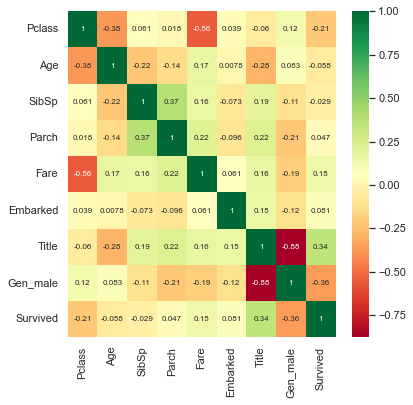

In [766]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn", annot_kws={"fontsize": 8});

In [767]:
features_cols = ['Pclass', 'Age','Fare', 'Embarked', 'Title', 'Gen_male']
print(features_cols)

['Pclass', 'Age', 'Fare', 'Embarked', 'Title', 'Gen_male']


In [768]:
from sklearn.model_selection import train_test_split

In [769]:
#dataframe
X = df[features_cols] #Features
#Series
y = df.Survived #Target variable
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05 ,  random_state = 30)

In [770]:
len(y_train)

1243

In [771]:
len(y_test)

66

# DICISION TREE

In [772]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dpth = 4
clf = DecisionTreeClassifier(criterion="entropy", max_depth = dpth)

In [773]:
# Train Classifer - Model
model = clf.fit(X_train,y_train)

### clf

In [774]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [775]:
len(y_pred)

66

In [776]:
y = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})
y.head(20)

,Original,Predicted
659,0,0
338,1,0
610,0,0
950,0,1
290,1,1
649,1,1
902,0,0
619,0,0
756,0,0
1150,0,0


In [777]:
import matplotlib.pyplot as plt

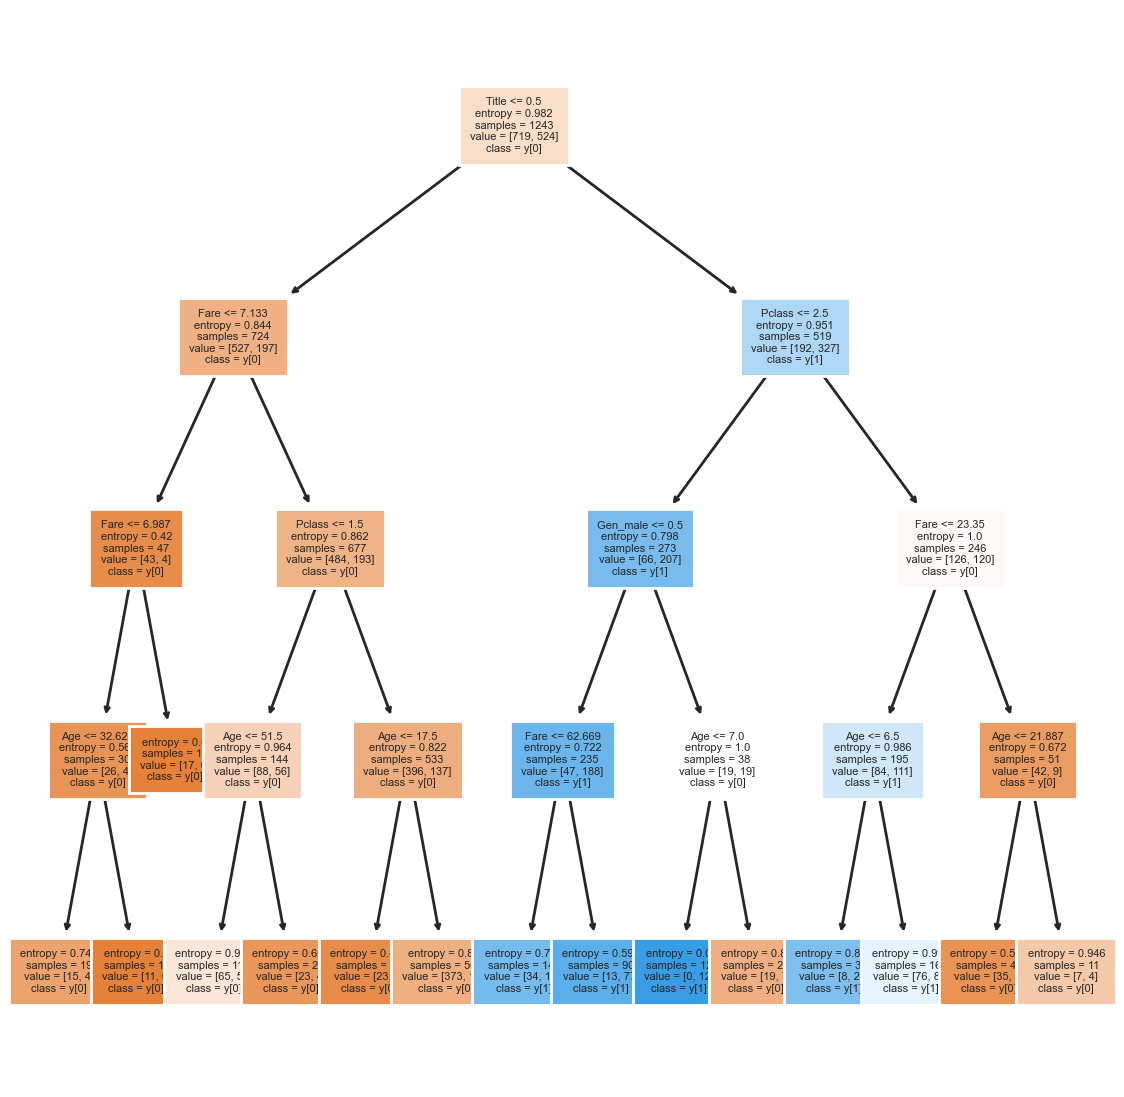

In [778]:
from sklearn import tree

# Plot the decision tree with customizations
plt.figure(figsize=(7, 7), dpi=200)
plt.title("Decision Tree Visualization")
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=True, fontsize=4, max_depth=dpth);

plt.show()

In [779]:
text_representation = tree.export_text(clf, feature_names=list(X_train.columns))
print(text_representation)

|--- Title <= 0.50
|   |--- Fare <= 7.13
|   |   |--- Fare <= 6.99
|   |   |   |--- Age <= 32.63
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  32.63
|   |   |   |   |--- class: 0
|   |   |--- Fare >  6.99
|   |   |   |--- class: 0
|   |--- Fare >  7.13
|   |   |--- Pclass <= 1.50
|   |   |   |--- Age <= 51.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  51.50
|   |   |   |   |--- class: 0
|   |   |--- Pclass >  1.50
|   |   |   |--- Age <= 17.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  17.50
|   |   |   |   |--- class: 0
|--- Title >  0.50
|   |--- Pclass <= 2.50
|   |   |--- Gen_male <= 0.50
|   |   |   |--- Fare <= 62.67
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  62.67
|   |   |   |   |--- class: 1
|   |   |--- Gen_male >  0.50
|   |   |   |--- Age <= 7.00
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  7.00
|   |   |   |   |--- class: 0
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- Age <= 6.50
|   |   |   |   |---

In [780]:
# calculate accuracy
from sklearn import metrics

result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)


Confusion Matrix:
[[34  6]
 [ 6 20]]


In [781]:
def plt1():
    import seaborn as sns; sns.set()
    c_mtrx = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx, annot=True, fmt = '.3g')

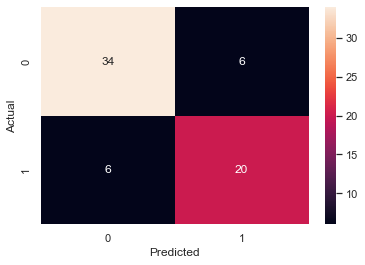

In [782]:
plt1()

In [783]:
#[row, column]
#(Actual, Predict)
TP = result[1, 1]      
TN = result[0, 0]
FP = result[0, 1]
FN = result[1, 0]

In [784]:
def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))
    print('###########################################')


In [785]:
EvClsMdl(result)

Metrics computed from a confusion matrix
Accuracy:	 0.8181818181818182
Sensitivity:	 0.7692307692307693
Specificity:	 0.85
Precision:	 0.7692307692307693
Classification Eerror: 0.18181818181818177
False_Positive_Rate: 0.15000000000000002
###########################################
